In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from transformers import AutoModel, AutoTokenizer, AutoConfig

import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
raw_df = pd.read_csv('mbti_1.csv')
raw_df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
raw_df.isnull().sum()

type     0
posts    0
dtype: int64

In [6]:
raw_df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [7]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

raw_df['words_per_comment'] = raw_df['posts'].apply(lambda x: len(x.split())/50)
raw_df['variance_of_word_counts'] = raw_df['posts'].apply(lambda x: var_row(x))
raw_df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


In [8]:
# Separate each user's posts into separate data samples
new_rows = []

for _, row in raw_df.iterrows():
    mbti_type = row['type']
    posts = row['posts']
    list_posts = posts.split("|||")
    for post in list_posts:
        new_rows.append({'type': mbti_type, 'post': post.strip()})

df = pd.DataFrame(new_rows)

In [9]:
df

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
...,...,...
422840,INFP,I was going to close my facebook a few months ...
422841,INFP,30 Seconds to Mars - All of my collections. It...
422842,INFP,"I have seen it, and i agree. I did actually th..."
422843,INFP,Ok so i have just watched Underworld 4 (Awaken...


In [11]:
print(raw_df.shape)
print(df.shape)

(8675, 4)
(422845, 2)


In [12]:
df.loc[11]['post']

"Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative..."

In [14]:
mbti_encoding = {
    'INFP': 0, 'INFJ': 1, 'INTP': 2, 'INTJ': 3,
    'ISFP': 4, 'ISFJ': 5, 'ISTP': 6, 'ISTJ': 7,
    'ENFP': 8, 'ENFJ': 9, 'ENTP': 10, 'ENTJ': 11,
    'ESFP': 12, 'ESFJ': 13, 'ESTP': 14, 'ESTJ': 15
}

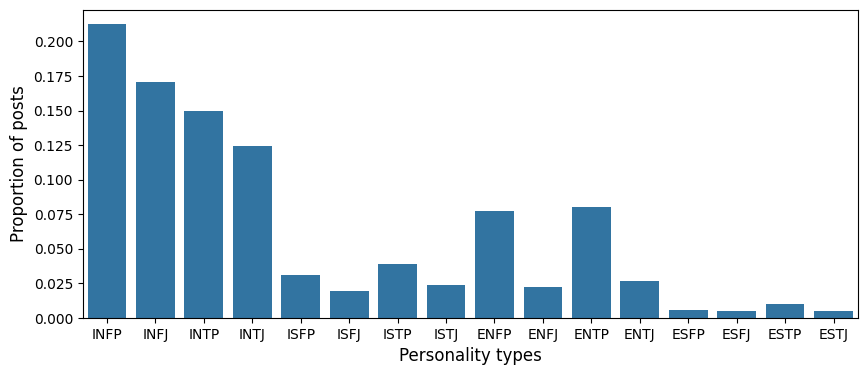

In [15]:
#Plotting this in descending order for better understanding of this visualization
cnt_srs = df['type'].value_counts()
cnt_srs = cnt_srs[mbti_encoding.keys()]
total_samples = cnt_srs.sum()

plt.figure(figsize=(10,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values / total_samples)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('Proportion of posts', fontsize=12)
plt.show()

In [16]:
df.head(3)

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...


In [17]:
df['type_index'] = df['type'].replace(mbti_encoding)

In [45]:
df.to_csv('one_post_per_row.csv', index=False)